# Shortest Path in Binary Matrix

Given an n x n binary matrix grid, return the length of the shortest clear path in the matrix. If there is no clear path, return -1.

A clear path in a binary matrix is a path from the top-left cell (i.e., (0, 0)) to the bottom-right cell (i.e., (n - 1, n - 1)) such that:

- All the visited cells of the path are 0.
- All the adjacent cells of the path are 8-directionally connected (i.e., they are different and they share an edge or a corner).

The length of a clear path is the number of visited cells of this path.

Example 1:

```
Input: grid = [[0,1],
               [1,0]]
Output: 2
```

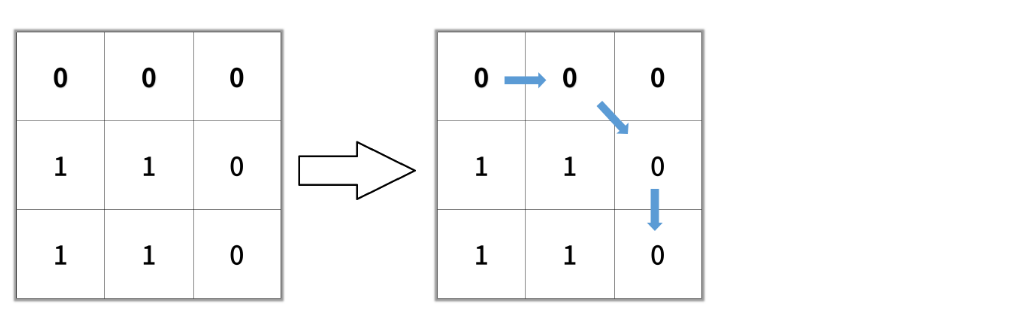

Example 2:

```
Input: grid = [[0,0,0],[1,1,0],[1,1,0]]
Output: 4
```

Example 3:

```
Input: grid = [[1,0,0],
               [1,1,0],
               [1,1,0]]
Output: -1
```

Constraints:

```
n == grid.length
n == grid[i].length
1 <= n <= 100
grid[i][j] is 0 or 1
```

In [4]:
from collections import deque 

class Solution:
    # Time = O(n)
    # Space = O(n)
    def shortestPathBinaryMatrix(self, grid: list[list[int]]) -> int:  
        
        max_row = len(grid) - 1
        max_col = len(grid[0]) - 1
        directions = [
            (-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
        
        # Helper function to find the neighbors of a given cell.
        def get_neighbours(row, col):
            for row_difference, col_difference in directions:
                new_row = row + row_difference
                new_col = col + col_difference
                if not(0 <= new_row <= max_row and 0 <= new_col <= max_col):
                    continue
                if grid[new_row][new_col] != 0:
                    continue
                yield (new_row, new_col)
        
        # Check that the first and last cells are open. 
        if grid[0][0] != 0 or grid[max_row][max_col] != 0:
            return -1
        
        # Set up the BFS.
        queue = deque([(0, 0)])
        visited = {(0, 0)}
        current_distance = 1
        
        # Do the BFS.
        while queue:
            # Process all nodes at current_distance from the top-left cell.
            nodes_of_current_distance = len(queue)
            for _ in range(nodes_of_current_distance):
                row, col = queue.popleft()
                if (row, col) == (max_row, max_col):
                    return current_distance
                for neighbour in get_neighbours(row, col):
                    if neighbour in visited:
                        continue
                    visited.add(neighbour)
                    queue.append(neighbour)
            # We'll now be processing all nodes at current_distance + 1
            current_distance += 1
                    
        # There was no path.
        return -1 
        

In [6]:
grid = [[0,1],[1,0]]
expected = 2

output = Solution().shortestPathBinaryMatrix(grid)
print(output)
assert output == expected

2


In [7]:
grid = [[0,0,0],[1,1,0],[1,1,0]]
expected = 4

output = Solution().shortestPathBinaryMatrix(grid)
print(output)
assert output == expected

4


In [8]:
grid = [[1,0,0],[1,1,0],[1,1,0]]
expected = -1

output = Solution().shortestPathBinaryMatrix(grid)
print(output)
assert output == expected





-1
